# Cactus plot

Plus d'informations dans le README du dossier [courant](./).

## Imports nécessaires

In [1]:
from metrics.wallet import *
from common import *
import matplotlib.pyplot as plt

## Analyse importée!

In [2]:
analysis = import_analysis_from_file(ANALYSIS_09_MERGE_LIGHT)

In [3]:
def f(x):
    if 'impact' in x:
        return 'impact'
    if 'activity' in x:
        return 'activity'
    if 'domddeg' in x or 'ddegondom' in x:
        return 'ddegondom'
    if 'chsa' in x:
        return 'chs'
    if 'chs' in x:
        return 'chs'
    if 'cacd' in x:
        return 'cacd'

analysis = analysis.add_variable(
    'h',
    lambda x: f(x['old_experiment_ware'])
)

activity


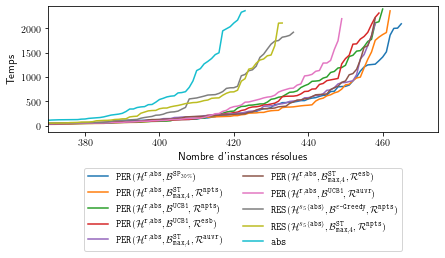

cacd


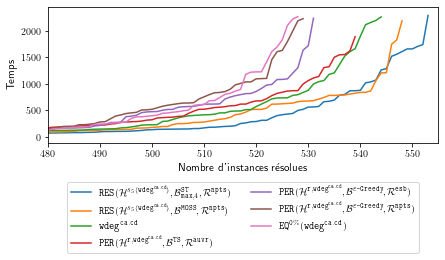

chs


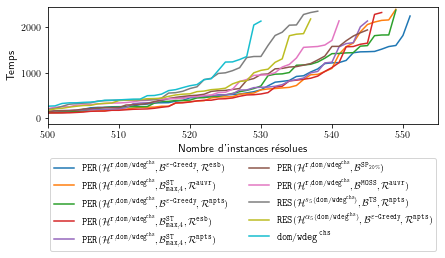

ddegondom


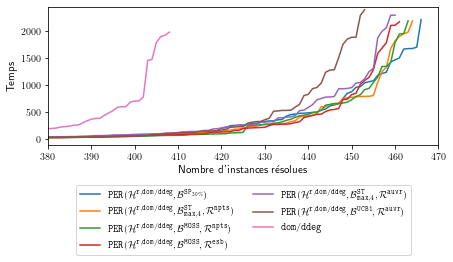

impact


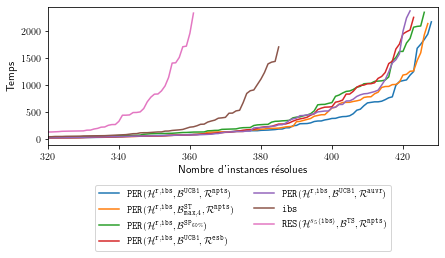

In [12]:
size = {
    'activity': (370, 475),
    'cacd': (480, 555),
    'chs': (500, 555),
    'ddegondom': (380, 470),
    'impact': (320, 430),
}

fig = {
    'activity': (7, 2.3),
    'cacd': (7, 2.5),
    'chs': (7, 2.15),
    'ddegondom': (7, 2.55),
    'impact': (7, 2.55),
}

for sub in analysis.groupby('h'):
    h = sub.data_frame.h.unique()[0]
    print(h)
    
    sub.cactus_plot(
        # Cactus plot specificities
        cumulated=False,
        cactus_col='cpu_time',
        show_marker=False,

        # Figure size
        figure_size=fig[h],

        # Titles
        title='',
        x_axis_name='Nombre d\'instances résolues',
        y_axis_name='Temps',

        # Axis limits
        x_min=size[h][0],
        x_max=size[h][1],
        y_min=None,
        y_max=2450,

        # Axis scaling
        logx=False,
        logy=False,

        # Legend parameters
        legend_location=Position.BOTTOM,
        legend_offset=(0, -0.15),
        ncol_legend=2,

        # Style mapping
        #color_map=R_COLOR_MAP,
        #style_map=R_STYLE_MAP,

        # Title font styles
        #title_font_name='Times New Roman',
        title_font_color='#000000',
        title_font_size=11,
        title_font_weight=FontWeight.BOLD,

        # Label font styles
        #label_font_name='Times New Roman',
        label_font_color='#000000',
        label_font_size=11,
        label_font_weight=FontWeight.BOLD,

        # Others
        latex_writing=True,
        output=f"fig/2A-{h}.pdf",
        dynamic=False
    )
    
    plt.show()
    